# Assignments: Cleaning Data

## 1. Data in Python Request

* Read in data from the Excel spreadsheet (Alarm Survey Data.xlsx) and put into a Pandas DataFrame
* Check the data type of each column
* Convert object columns into numeric or datetime columns, as needed

In [2]:
import pandas as pd

In [3]:
alarm_survey_data = pd.read_excel("../Data/Alarm Survey Data.xlsx")
alarm_survey_data.head()

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
0,1,34,3.0,active,3.0,1,5 stars
1,2,31,3.0,light,3.0,3,3 stars
2,3,18,0.0,light_activity,4.0,1,1 stars
3,4,42,4.0,active,4.0,1,4 stars
4,5,30,1.0,light_activity,1.0,4,3 stars


In [4]:
alarm_survey_data.dtypes

survey_id               int64
age                     int64
number_of_children    float64
activity_level         object
sleep_quality         float64
number_of_snoozes       int64
alarm_rating           object
dtype: object

In [5]:
alarm_survey_data['alarm_rating'] = pd.to_numeric(alarm_survey_data.alarm_rating.astype('str').str.replace('stars',''))
alarm_survey_data.head()

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
0,1,34,3.0,active,3.0,1,5
1,2,31,3.0,light,3.0,3,3
2,3,18,0.0,light_activity,4.0,1,1
3,4,42,4.0,active,4.0,1,4
4,5,30,1.0,light_activity,1.0,4,3


In [6]:
alarm_survey_data.dtypes

survey_id               int64
age                     int64
number_of_children    float64
activity_level         object
sleep_quality         float64
number_of_snoozes       int64
alarm_rating            int64
dtype: object

## 2. Missing Data Check

* Find any missing data
* Deal with the missing data

In [7]:
alarm_survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   survey_id           6433 non-null   int64  
 1   age                 6433 non-null   int64  
 2   number_of_children  6433 non-null   float64
 3   activity_level      6433 non-null   object 
 4   sleep_quality       6082 non-null   float64
 5   number_of_snoozes   6433 non-null   int64  
 6   alarm_rating        6433 non-null   int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 351.9+ KB


In [8]:
alarm_survey_data[alarm_survey_data.isna().any(axis=1)]

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
10,11,28,2.0,light_activity,NaN,3,4
18,19,38,2.0,lightly active,NaN,1,5
23,24,24,2.0,very active,NaN,1,5
26,27,25,2.0,lightly active,NaN,1,2
28,29,29,2.0,lightly active,NaN,1,2
...,...,...,...,...,...,...,...
6310,6311,30,2.0,very active,NaN,0,3
6319,6320,44,2.0,lightly active,NaN,0,3
6375,6309,32,3.0,light,NaN,0,3
6377,6311,30,2.0,very active,NaN,0,3


In [9]:
alarm_survey_data.sleep_quality.value_counts(dropna=False)

sleep_quality
5.0    2721
4.0    2261
3.0     997
NaN     351
1.0     103
Name: count, dtype: int64

In [10]:
alarm_survey_data['sleep_quality'] = alarm_survey_data['sleep_quality'].fillna(2)

In [11]:
alarm_survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   survey_id           6433 non-null   int64  
 1   age                 6433 non-null   int64  
 2   number_of_children  6433 non-null   float64
 3   activity_level      6433 non-null   object 
 4   sleep_quality       6433 non-null   float64
 5   number_of_snoozes   6433 non-null   int64  
 6   alarm_rating        6433 non-null   int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 351.9+ KB


In [12]:
alarm_survey_data.sleep_quality.value_counts(dropna=False)

sleep_quality
5.0    2721
4.0    2261
3.0     997
2.0     351
1.0     103
Name: count, dtype: int64

## 3. Inconsistent Text & Typos Check

* Find any inconsistent text and typos
* Deal with the inconsistent text and typos

In [13]:
alarm_survey_data.head()

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
0,1,34,3.0,active,3.0,1,5
1,2,31,3.0,light,3.0,3,3
2,3,18,0.0,light_activity,4.0,1,1
3,4,42,4.0,active,4.0,1,4
4,5,30,1.0,light_activity,1.0,4,3


In [14]:
alarm_survey_data.describe()

,survey_id,age,number_of_children,sleep_quality,number_of_snoozes,alarm_rating
count,6433.000000,6433.000000,6433.000000,6433.000000,6433.000000,6433.000000
mean,3216.302192,29.069175,1.395616,4.110835,1.145811,2.955075
std,1856.007409,7.472048,1.432192,0.963415,1.599481,1.101363
min,1.000000,13.000000,0.000000,1.000000,0.000000,1.000000
25%,1609.000000,23.000000,0.000000,4.000000,0.000000,2.000000
50%,3217.000000,28.000000,1.000000,4.000000,0.000000,3.000000
75%,4825.000000,34.000000,2.000000,5.000000,2.000000,4.000000
max,6366.000000,47.000000,5.500000,5.000000,19.000000,5.000000


In [15]:
alarm_survey_data['number_of_children'].value_counts()

number_of_children
0.0    2440
2.0    1498
1.0    1172
3.0     788
4.0     331
5.5     204
Name: count, dtype: int64

In [16]:
alarm_survey_data[alarm_survey_data['number_of_children']==5.5] = 5.0
alarm_survey_data['number_of_children'].value_counts()

number_of_children
0.0    2440
2.0    1498
1.0    1172
3.0     788
4.0     331
5.0     204
Name: count, dtype: int64

In [17]:
alarm_survey_data['activity_level'].value_counts()

activity_level
active            2367
lightly active    2225
light_activity     689
very active        625
light              323
5.0                204
Name: count, dtype: int64

In [18]:
alarm_survey_data['activity_level'] = alarm_survey_data['activity_level'].map({
    "active":"active",
    "lightly active":"lightly active",
    "light_activity":"lightly active",
    "very active":"very active",
    "light":"lightly active"
})
alarm_survey_data['activity_level'].value_counts()

activity_level
lightly active    3237
active            2367
very active        625
Name: count, dtype: int64

## 4. Duplicate Data Check

* Find any duplicate data
* Deal with the duplicate data

In [19]:
alarm_survey_data[alarm_survey_data.duplicated(keep=False)]

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
6,5,5,5.0,NaN,5.0,5,5
7,5,5,5.0,NaN,5.0,5,5
12,5,5,5.0,NaN,5.0,5,5
17,5,5,5.0,NaN,5.0,5,5
21,5,5,5.0,NaN,5.0,5,5
...,...,...,...,...,...,...,...
6428,6362,27,2.0,active,5.0,0,5
6429,6363,31,1.0,lightly active,4.0,0,4
6430,6364,26,0.0,lightly active,5.0,0,3
6431,6365,27,1.0,active,5.0,0,3


In [20]:
alarm_survey_data.duplicated(keep=False).sum()

np.int64(336)

**Handling Duplicated Data**

In [21]:
alarm_survey_data = alarm_survey_data.drop_duplicates()

In [22]:
alarm_survey_data.reset_index(drop=True,inplace=True)

In [23]:
alarm_survey_data.shape

(6164, 7)

In [24]:
## another methods
alarm_survey_data = alarm_survey_data[~alarm_survey_data.duplicated()]
alarm_survey_data.shape

(6164, 7)

## 5. Outliers Check

* Find any outliers
* Deal with the outliers

array([[<Axes: title={'center': 'survey_id'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'number_of_children'}>,
        <Axes: title={'center': 'sleep_quality'}>],
       [<Axes: title={'center': 'number_of_snoozes'}>,
        <Axes: title={'center': 'alarm_rating'}>]], dtype=object)

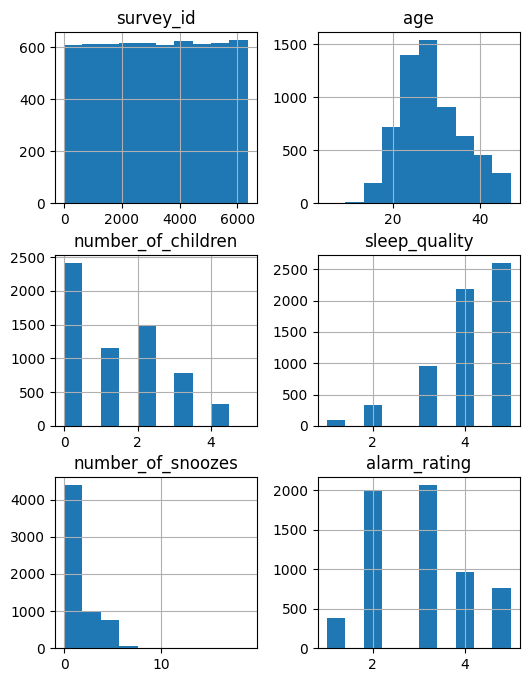

In [25]:
alarm_survey_data.hist(figsize=(6,8))

In [26]:
import seaborn as sns

<Axes: xlabel='number_of_snoozes', ylabel='Count'>

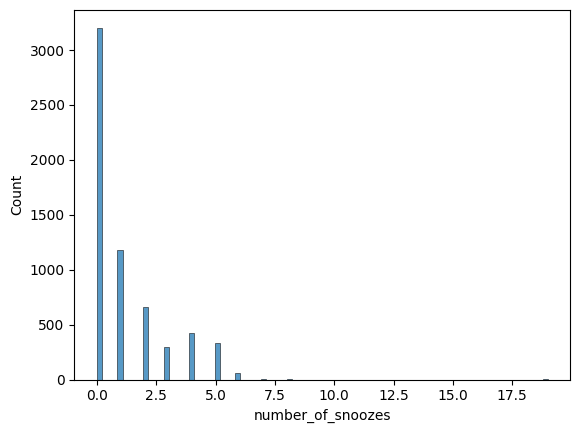

In [27]:
sns.histplot(alarm_survey_data.number_of_snoozes)

<Axes: xlabel='number_of_snoozes'>

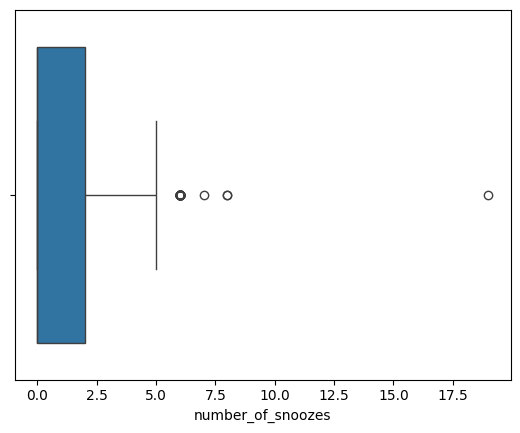

In [28]:
sns.boxplot(x = alarm_survey_data.number_of_snoozes)

In [29]:
alarm_survey_data.number_of_snoozes.value_counts()

number_of_snoozes
0     3204
1     1180
2      665
4      421
5      333
3      300
6       57
8        2
19       1
7        1
Name: count, dtype: int64

In [30]:
alarm_survey_data = alarm_survey_data[alarm_survey_data.number_of_snoozes <= 19]
alarm_survey_data

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
0,1,34,3.0,active,3.0,1,5
1,2,31,3.0,lightly active,3.0,3,3
2,3,18,0.0,lightly active,4.0,1,1
3,4,42,4.0,active,4.0,1,4
4,5,30,1.0,lightly active,1.0,4,3
...,...,...,...,...,...,...,...
6159,6362,27,2.0,active,5.0,0,5
6160,6363,31,1.0,lightly active,4.0,0,4
6161,6364,26,0.0,lightly active,5.0,0,3
6162,6365,27,1.0,active,5.0,0,3


## 6. Data Issues Check

* Quickly explore the updated DataFrame. How do things look now after handling the data issues compared to the original DataFrame?

In [31]:
# ## missing data
alarm_survey_data[alarm_survey_data.isna().any(axis=1)]
alarm_survey_data = alarm_survey_data.dropna(subset=['activity_level'])
alarm_survey_data[alarm_survey_data.isna().any(axis=1)]

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating


In [32]:
## inconsistencies
alarm_survey_data.head()

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
0,1,34,3.0,active,3.0,1,5
1,2,31,3.0,lightly active,3.0,3,3
2,3,18,0.0,lightly active,4.0,1,1
3,4,42,4.0,active,4.0,1,4
4,5,30,1.0,lightly active,1.0,4,3


In [33]:
alarm_survey_data['activity_level'].value_counts()

activity_level
lightly active    3211
active            2340
very active        612
Name: count, dtype: int64

In [34]:
## duplicates
alarm_survey_data[alarm_survey_data.duplicated()]

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating


In [35]:
## outliers
alarm_survey_data.describe()

,survey_id,age,number_of_children,sleep_quality,number_of_snoozes,alarm_rating
count,6163.000000,6163.000000,6163.000000,6163.000000,6163.000000,6163.000000
mean,3195.419601,28.751907,1.261723,4.114879,1.158202,2.958786
std,1837.517363,7.319633,1.244843,0.955405,1.606278,1.103793
min,1.000000,13.000000,0.000000,1.000000,0.000000,1.000000
25%,1608.500000,23.000000,0.000000,4.000000,0.000000,2.000000
50%,3195.000000,27.000000,1.000000,4.000000,0.000000,3.000000
75%,4783.500000,33.000000,2.000000,5.000000,2.000000,4.000000
max,6366.000000,47.000000,4.000000,5.000000,19.000000,5.000000


array([[<Axes: title={'center': 'survey_id'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'number_of_children'}>,
        <Axes: title={'center': 'sleep_quality'}>],
       [<Axes: title={'center': 'number_of_snoozes'}>,
        <Axes: title={'center': 'alarm_rating'}>]], dtype=object)

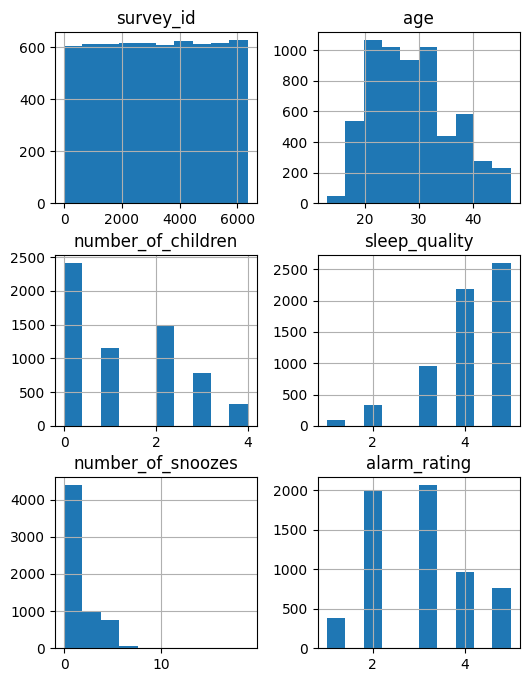

In [36]:
alarm_survey_data.hist(figsize=(6,8))

<Axes: xlabel='number_of_snoozes', ylabel='Count'>

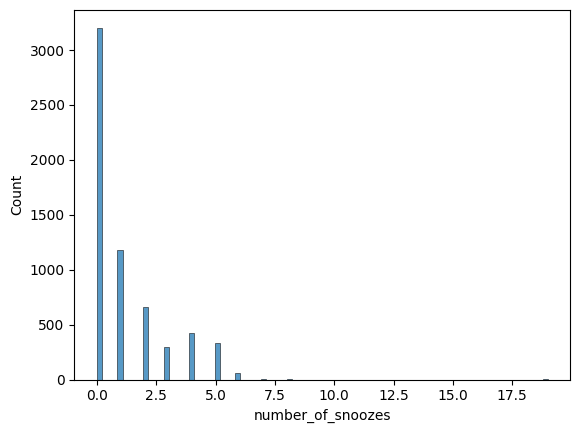

In [37]:
import seaborn as sns
sns.histplot(alarm_survey_data.number_of_snoozes)

<Axes: ylabel='number_of_snoozes'>

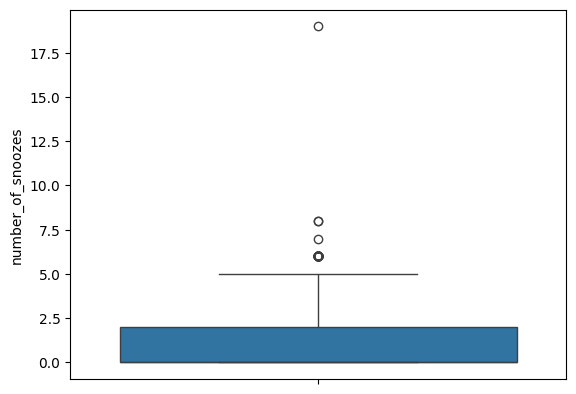

In [38]:
sns.boxplot(alarm_survey_data.number_of_snoozes)

In [39]:
alarm_survey_data['number_of_snoozes'].value_counts()

number_of_snoozes
0     3204
1     1180
2      665
4      421
5      332
3      300
6       57
8        2
19       1
7        1
Name: count, dtype: int64

<Axes: ylabel='number_of_snoozes'>

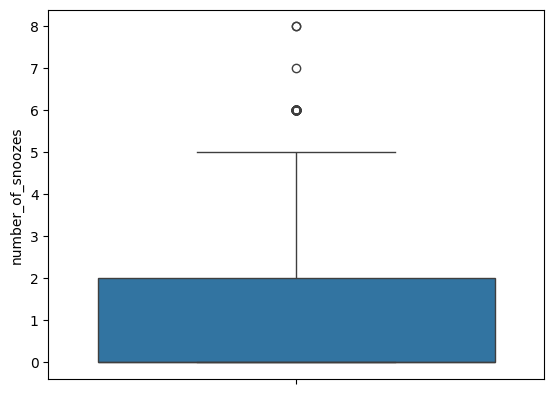

In [40]:
alarm_survey_data = alarm_survey_data[alarm_survey_data['number_of_snoozes'] < 19]
sns.boxplot(alarm_survey_data.number_of_snoozes)

In [41]:
alarm_survey_data.describe()

,survey_id,age,number_of_children,sleep_quality,number_of_snoozes,alarm_rating
count,6162.000000,6162.000000,6162.000000,6162.000000,6162.000000,6162.000000
mean,3195.816456,28.753489,1.261766,4.114735,1.155307,2.958780
std,1837.402326,7.319173,1.244939,0.955416,1.590242,1.103883
min,1.000000,13.000000,0.000000,1.000000,0.000000,1.000000
25%,1609.250000,23.000000,0.000000,4.000000,0.000000,2.000000
50%,3195.500000,27.000000,1.000000,4.000000,0.000000,3.000000
75%,4783.750000,33.000000,2.000000,5.000000,2.000000,4.000000
max,6366.000000,47.000000,4.000000,5.000000,8.000000,5.000000


## 7. Create Columns From Numeric Data

* Read data into Python
* Check the data type of each column
* Create a numeric column using arithmetic
* Create a numeric column using conditional logic

In [42]:
# Create a “Total Spend” column that includes both the pen cost and shipping cost for each sale
# Create a “Free Shipping” column that says yes if the sale included free shipping, and no otherwise

In [43]:
import pandas as pd

p_df = pd.read_excel("../Data/Pen Sales Data.xlsx")

In [44]:
p_df.head()

,Customer,Item,Pen Cost,Shipping Cost,Purchase Date,Delivery Date,Review
0,5201,Ballpoint Pens,5.99,2.99,2023-05-01,2023-05-03,"DoodleWithMe|I love the way this pen writes, b..."
1,5202,Sharpies,12.99,0.00,2023-05-01,2023-05-04,ScribbleMaster|The classic Sharpie marker has ...
2,5203,Ballpoint Pens (Bold),6.95,4.99,2023-05-01,2023-05-02,PenPalForever|The retractable ballpoint pen ha...
3,5204,Gel Pens,5.99,2.99,2023-05-01,2023-05-04,TheWriteWay|This gel pen has a comfortable gri...
4,5205,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-03,PenAndPaperPerson|The rollerball pen has a smo...


In [45]:
p_df['Total spend'] = p_df['Pen Cost'] + p_df['Shipping Cost']
p_df.head(5)

,Customer,Item,Pen Cost,Shipping Cost,Purchase Date,Delivery Date,Review,Total spend
0,5201,Ballpoint Pens,5.99,2.99,2023-05-01,2023-05-03,"DoodleWithMe|I love the way this pen writes, b...",8.98
1,5202,Sharpies,12.99,0.00,2023-05-01,2023-05-04,ScribbleMaster|The classic Sharpie marker has ...,12.99
2,5203,Ballpoint Pens (Bold),6.95,4.99,2023-05-01,2023-05-02,PenPalForever|The retractable ballpoint pen ha...,11.94
3,5204,Gel Pens,5.99,2.99,2023-05-01,2023-05-04,TheWriteWay|This gel pen has a comfortable gri...,8.98
4,5205,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-03,PenAndPaperPerson|The rollerball pen has a smo...,14.98


In [46]:
import numpy as np
p_df['Free Shipping'] = np.where((p_df['Shipping Cost'] ==  0.00 ),'yes','no')
p_df.loc[p_df['Shipping Cost'] > 1, ['Free Shipping','Shipping Cost']]

,Free Shipping,Shipping Cost
0,no,2.99
2,no,4.99
3,no,2.99
4,no,1.99
5,no,1.99
6,no,1.99
7,no,1.99
8,no,2.99
9,no,4.99
11,no,2.99


## 8. Create Columns From DateTime Data

* Calculate the difference between two datetime columns and save it as a new column
* Take the average of a column

In [47]:
# Calculate the number of days between the purchase and delivery date for each sale
# Save it as a new column called “Delivery Time”
# What were the average days from purchase to delivery?

In [48]:
p_df['Delivery Date'] - p_df['Purchase Date']

0    2 days
1    3 days
2    1 days
3    3 days
4    2 days
5    3 days
6    2 days
7    6 days
8    5 days
9    1 days
10   3 days
11   6 days
12   2 days
13   6 days
14   2 days
15   2 days
16   2 days
17   1 days
18   5 days
19   5 days
20   3 days
21   3 days
22   4 days
23   4 days
24   5 days
dtype: timedelta64[ns]

In [49]:
p_df['Delivery Time'] = p_df['Delivery Date'] - p_df['Purchase Date']
p_df.head()

,Customer,Item,Pen Cost,Shipping Cost,Purchase Date,Delivery Date,Review,Total spend,Free Shipping,Delivery Time
0,5201,Ballpoint Pens,5.99,2.99,2023-05-01,2023-05-03,"DoodleWithMe|I love the way this pen writes, b...",8.98,no,2 days
1,5202,Sharpies,12.99,0.00,2023-05-01,2023-05-04,ScribbleMaster|The classic Sharpie marker has ...,12.99,yes,3 days
2,5203,Ballpoint Pens (Bold),6.95,4.99,2023-05-01,2023-05-02,PenPalForever|The retractable ballpoint pen ha...,11.94,no,1 days
3,5204,Gel Pens,5.99,2.99,2023-05-01,2023-05-04,TheWriteWay|This gel pen has a comfortable gri...,8.98,no,3 days
4,5205,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-03,PenAndPaperPerson|The rollerball pen has a smo...,14.98,no,2 days


## 9. Create Columns From Text Data

* Split one column into multiple columns
* Create a Boolean column (True / False) to show whether a text field contains particular words

In [50]:
# Split the reviews on the “|” character to create two new columns: “User Name” and “Review Text”
# Create a “Leak or Spill” column that flags the reviews that mention either “leak” or “spill”

In [54]:
p_df['User Name']= p_df['Review'][0].split("|")[0]
p_df['Review Text']= p_df['Review'][0].split("|")[1]
p_df.head()


,Customer,Item,Pen Cost,Shipping Cost,Purchase Date,Delivery Date,Review,Total spend,Free Shipping,Delivery Time,User Name,Review Text
0,5201,Ballpoint Pens,5.99,2.99,2023-05-01,2023-05-03,"DoodleWithMe|I love the way this pen writes, b...",8.98,no,2 days,DoodleWithMe,"I love the way this pen writes, but unfortunat..."
1,5202,Sharpies,12.99,0.00,2023-05-01,2023-05-04,ScribbleMaster|The classic Sharpie marker has ...,12.99,yes,3 days,DoodleWithMe,"I love the way this pen writes, but unfortunat..."
2,5203,Ballpoint Pens (Bold),6.95,4.99,2023-05-01,2023-05-02,PenPalForever|The retractable ballpoint pen ha...,11.94,no,1 days,DoodleWithMe,"I love the way this pen writes, but unfortunat..."
3,5204,Gel Pens,5.99,2.99,2023-05-01,2023-05-04,TheWriteWay|This gel pen has a comfortable gri...,8.98,no,3 days,DoodleWithMe,"I love the way this pen writes, but unfortunat..."
4,5205,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-03,PenAndPaperPerson|The rollerball pen has a smo...,14.98,no,2 days,DoodleWithMe,"I love the way this pen writes, but unfortunat..."


In [73]:
## checking 
import numpy as np

p_df['Leak or Spill'] = np.where(p_df['Review'].str.contains("leak" or "spill", regex=True),'true','false')
p_df.head()

,Customer,Item,Pen Cost,Shipping Cost,Purchase Date,Delivery Date,Review,Total spend,Free Shipping,Delivery Time,User Name,Review Text,Leak or Spill
0,5201,Ballpoint Pens,5.99,2.99,2023-05-01,2023-05-03,"DoodleWithMe|I love the way this pen writes, b...",8.98,no,2 days,DoodleWithMe,"I love the way this pen writes, but unfortunat...",true
1,5202,Sharpies,12.99,0.00,2023-05-01,2023-05-04,ScribbleMaster|The classic Sharpie marker has ...,12.99,yes,3 days,DoodleWithMe,"I love the way this pen writes, but unfortunat...",false
2,5203,Ballpoint Pens (Bold),6.95,4.99,2023-05-01,2023-05-02,PenPalForever|The retractable ballpoint pen ha...,11.94,no,1 days,DoodleWithMe,"I love the way this pen writes, but unfortunat...",false
3,5204,Gel Pens,5.99,2.99,2023-05-01,2023-05-04,TheWriteWay|This gel pen has a comfortable gri...,8.98,no,3 days,DoodleWithMe,"I love the way this pen writes, but unfortunat...",false
4,5205,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-03,PenAndPaperPerson|The rollerball pen has a smo...,14.98,no,2 days,DoodleWithMe,"I love the way this pen writes, but unfortunat...",false
